In [1]:
####################################l'import des bibliothèques##########################################################
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import os
import pandas as pd
import math
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
## bayesien
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# logistic regression 
from sklearn.linear_model import LogisticRegression 
# l'assurance de l'équilibre du dataset ( dealing with imbalanced data)
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
# le centrage des données 
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn import decomposition
from sklearn.preprocessing import OrdinalEncoder
#################################### l'import des bibliothèques ##########################################################

In [2]:
######################################fonction de normalisation########################################################

def normalisation(dataframe):
    x = dataframe.iloc[:, :-1].values #returns a numpy array
    X_scaler = preprocessing.StandardScaler()
    x_scaled = X_scaler.fit_transform(x)
    dataframe = pd.DataFrame(x_scaled,columns=["V1","V2"])
    return dataframe

######################################fonction de normalisation#######################################################

In [3]:
 ######################################## KNN ####################################################################

def knn(data,s):
    
    X = s.values
    # la variable classe " type d'appartenance"
    y = data.values
    # création des données de test et d'entrainement

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

    # Le choix du k 
    error = []

    # Calcul des erreurs en k variant 
    for i in range(2, 40):
        print(i)
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_test)
        error.append(np.mean(pred_i != y_test))

    print("le nombre de k idéal est l'un des valeur de la liste indice +1")   
    indices = [i for i, x in enumerate(error) if x == min(error)]
    print(indices)
    print("par choix nous avons pris le plus grand ")
    print(int(indices[-1])+2)
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
             markerfacecolor='blue', markersize=10)
    plt.title('Error Rate K Value')
    plt.xlabel('K Value')
    plt.ylabel('Mean Error')

In [4]:
######################################### bayesien naif###########################################################

def bayesien_naif(data,s):
    #On sépare les données et les classes
    x = s
    y = data
    #On fractionne les datas (train-test)
    x_train, x_test, y_train, y_test = train_test_split(s,y,test_size=0.20,random_state=42)
    print(x_train.shape)
    print(x_test.shape)
    print(y_test.shape)
    print(y_train.shape)
    #On instancie le modèle
    model_Gaussian = GaussianNB()
    
    #Entrainement
    model_Gaussian.fit(x_train, y_train)
    
    #Prédiction
    prediction = model_Gaussian.predict(x_test)
    print(prediction)
    
    #On évalue le model afin de connaitre sa précision, la valeur est donnée entre 0 et 1 (d'où le *100)
    precision = accuracy_score(y_test, prediction)*100
    print(precision)
    

In [5]:
############################### Random forest############################################################
def random_forest(data,s):
    x = s
    print(x)
    y = data
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.4)
    print(x_train)
    print(y_train)
    #n_estimators : le nombre d'arbres générés
    aleatoire = RandomForestClassifier()
    aleatoire.fit(x_train, y_train)
    a=aleatoire.score(x_test, y_test)
    print(a)
    prediction= aleatoire.predict(x_test)
    print('je suis')
    print(prediction)
    cm = confusion_matrix(y_test, prediction)
    print(cm)
    plt.figure(figsize=(10, 7))
    sn.heatmap(cm, annot=True)
    plt.title('random forest table')
    plt.xlabel('prédit ')
    plt.ylabel('testés')




In [6]:
################################################ LDA ############################################################
def LDA(data,s):  
    X = s
    y = data
    lda = LinearDiscriminantAnalysis()
    lda.fit(X,y)
    print(lda.score(X,y))

############################################### LDA #############################################################

############################################### QDA #############################################################

def QDA(data,s):
    X = s
    y = data
    qda = QuadraticDiscriminantAnalysis()
    model = qda.fit(X, y)
    print(model.score(X,y))

############################################### QDA #############################################################

############################################## Decision tree ###################################################
def decision_tree(data,s):
    x = s
    y = data
    x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=1)
    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier()

    # Train Decision Tree Classifer
    clf = clf.fit(x_train,y_train)
    
    #Predict the response for test dataset
    y_pred = clf.predict(x_test)
    print("Accuracy:",accuracy_score(y_test, y_pred))

############################################## Decision Tree ###################################################

In [7]:
########################################## SVM linear #########################################################

from sklearn.svm import SVC
from sklearn.metrics import classification_report

def SVM_Linear(data,s):
    X = s
    y = data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)
    svm = SVC(kernel='linear')
    svm.fit(X_train, y_train)
    sm = svm.score(X_test,y_test)
    print("le score est ")
    print(sm)
    y_pred = svm.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
########################################## SVM  linear ##########################################################

########################################## SVM non linear  #########################################################

from sklearn.svm import SVC
from sklearn.metrics import classification_report

def SVM_non_Linear(data,s):
    X = s
    y = data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)
    svm = SVC(kernel='poly')
    svm.fit(X_train, y_train)
    sm = svm.score(X_test,y_test)
    print("le score est ")
    print(sm)
    y_pred = svm.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))



In [8]:
########################################## Linear reggression ###################################################
def regression_lineaire(data,s):
    X = s
    y = data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(y_pred)
    m = model.score(X_test,y_pred)
    print(m)
######################################### Linear regression ######################################################

In [9]:
########################################### Fonction comparaison #################################################


########################################## Fonction comparaison #################################################

In [10]:
######################################## Test sur les données synthétiques #######################################

# La récupération des données 
data_spiral = pd.read_csv("data/spiral.txt", sep="\t")
data_flame =pd.read_csv("data/flame.txt", sep="\t")
data_agg = pd.read_csv("data/flame.txt", sep="\t")

# la normalisation des données 
norm_spiral= normalisation(data_spiral)
norm_flame= normalisation(data_flame)
norm_agg=normalisation(data_agg)


---------------------Etude exploratoire préliminaire---------------------


Spiral
            31.95        7.95
count  311.000000  311.000000
mean    18.364630   16.371704
std      7.270992    6.861701
min      3.000000    2.900000
25%     12.875000   11.375000
50%     18.200000   16.050000
75%     23.275000   21.425000
max     31.650000   31.650000
Flame
             1.85        27.8
count  239.000000  239.000000
mean     7.346653   20.899791
std      3.189473    3.360983
min      0.500000   14.450000
25%      5.275000   18.225000
50%      7.300000   20.700000
75%      9.325000   23.525000
max     14.200000   27.600000
Aggregation
             1.85        27.8
count  239.000000  239.000000
mean     7.346653   20.899791
std      3.189473    3.360983
min      0.500000   14.450000
25%      5.275000   18.225000
50%      7.300000   20.700000
75%      9.325000   23.525000
max     14.200000   27.600000


{'whiskers': [<matplotlib.lines.Line2D at 0x248daa4c5b0>,
 'caps': [<matplotlib.lines.Line2D at 0x248daa4ccd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x248daa4c280>,
 'medians': [<matplotlib.lines.Line2D at 0x248daa562b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x248daa56610>,
 'means': []}

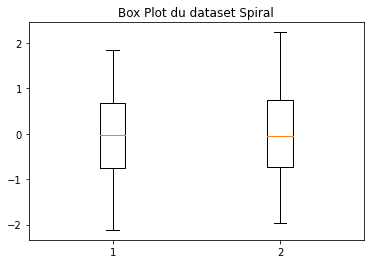

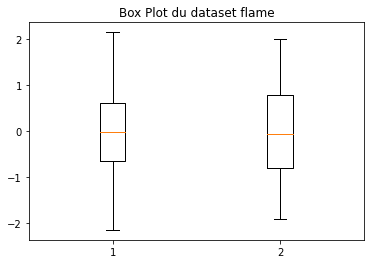

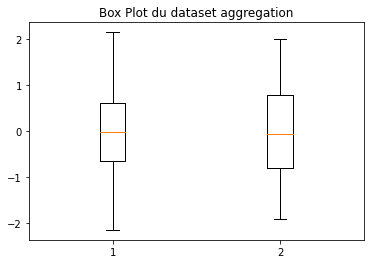

In [11]:
####################################### étude exploratoire préliminaire #############################################

print("---------------------Etude exploratoire préliminaire---------------------\n\n")
print("Spiral")
print(data_spiral.iloc[:, :-1].describe())

print("Flame")
print(data_flame.iloc[:, :-1].describe())

print("Aggregation")
print(data_agg.iloc[:, :-1].describe())



#box plot de chaque dataset 

fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot du dataset Spiral')
ax1.boxplot(norm_spiral)
fig2, ax2 = plt.subplots()
ax2.set_title('Box Plot du dataset flame')
ax2.boxplot(norm_flame)
fig3, ax3 = plt.subplots()
ax3.set_title('Box Plot du dataset aggregation')
ax3.boxplot(norm_agg)

####################################### étude exploratoire préliminaire #############################################

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
le nombre de k idéal est l'un des valeur de la liste indice +1
[0]
par choix nous avons pris le plus grand 
2


ValueError: x and y must have same first dimension, but have shapes (39,) and (38,)

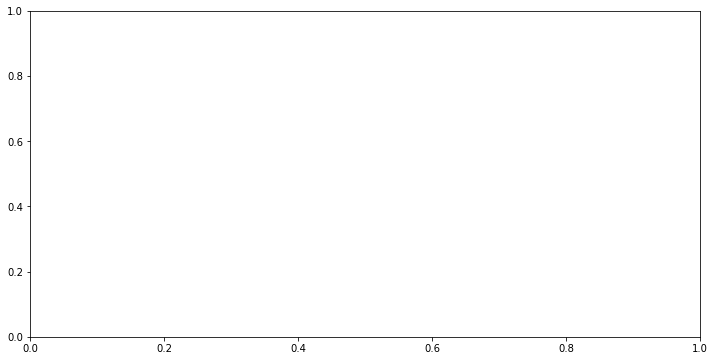

In [12]:
############################### La comparaison des méthodes sur le dataset Spiral ##################################

knn(data_spiral.iloc[:, -1],norm_spiral)
bayesien_naif(data_spiral.iloc[:, -1],norm_spiral)
random_forest(data_spiral.iloc[:, -1],norm_spiral)
decision_tree(data_spiral.iloc[:, -1],norm_spiral)
LDA(data_spiral.iloc[:, -1],norm_spiral)
QDA(data_spiral.iloc[:, -1],norm_spiral)
SVM_Linear(data_spiral.iloc[:, -1],norm_spiral)
regression_lineaire(data_spiral.iloc[:, -1],norm_spiral)

In [ ]:
knn(data_flame.iloc[:, -1],norm_flame)
bayesien_naif(data_flame.iloc[:, -1],norm_flame)
random_forest(data_flame.iloc[:, -1],norm_flame)
decision_tree(data_flame.iloc[:, -1],norm_flame)
LDA(data_flame.iloc[:, -1],norm_flame)
QDA(data_flame.iloc[:, -1],norm_flame)
SVM_Linear(data_flame.iloc[:, -1],norm_flame)
regression_lineaire(data_flame.iloc[:, -1],norm_flame)

In [ ]:
knn(data_agg.iloc[:, -1],norm_agg)
bayesien_naif(data_agg.iloc[:, -1],norm_agg)
random_forest(data_agg.iloc[:, -1],norm_agg)
decision_tree(data_agg.iloc[:, -1],norm_agg)
LDA(data_agg.iloc[:, -1],norm_agg)
QDA(data_agg.iloc[:, -1],norm_agg)
SVM_Linear(data_agg.iloc[:, -1],norm_agg)
regression_lineaire(data_agg.iloc[:, -1],norm_agg)

In [ ]:
######################################## Credit Card FRAUDE ####################################################
data_card=pd.read_csv("data/creditcard.csv")

x= data_card['Class'].value_counts()
# dealing with imbalanced data 
# la suppression de la variable temps car elle n'apporte aucune information significative à l'analyse 

data_card = data_card.iloc[:,1:]
# le centrage des données : 

rb = RobustScaler()

data_card['Amount'] = rb.fit_transform(data_card['Amount'].values.reshape(-1,1))
#print(data_card)

# l'application du under sampling 
rus = RandomUnderSampler()
x_underS, y_underS= rus.fit_sample(data_card.iloc[:,:-1],data_card.iloc[:,-1])

print(x_underS)
print(y_underS)
# l'application du over sampling 
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(data_card.iloc[:,:-1],data_card.iloc[:,-1])

#print(X_ros)


In [ ]:
    
knn(y_underS,x_underS)
bayesien_naif(y_underS,x_underS)
random_forest(y_underS,x_underS)
decision_tree(y_underS,x_underS)
LDA(y_underS,x_underS)
QDA(y_underS,x_underS)
SVM_Linear(y_underS,x_underS)
regression_lineaire(y_underS,x_underS)

In [ ]:
#knn(y_ros,X_ros)


In [ ]:
########################################### VISA PREMIER ######################################################
df_visa = pd.read_csv("data/Visapremier.txt", sep="\t")

#On récupere toutes les valeurs qui ne sont pas numériques et les colonnes comportant des points
#(qui correspondent dans notre dataset à des valeurs nulles)
str_var = df_visa.select_dtypes(exclude=np.number).columns.tolist()
str_var

In [ ]:
#Outil pour passer de cat en nombre
from sklearn import decomposition
enc = OrdinalEncoder()
df_visa_tr = df_visa.copy()

#on remplace les valeurs categorielles en leur codage numerique
df_visa_tr[str_var]=enc.fit_transform(df_visa[str_var])

#recuperation de la variable à expliquer
Y = df_visa_tr.cartevpr

#suppression de la variable à expliquer (elle existe en double)
df_visa_tr.drop(columns=['cartevp', 'cartevpr'], inplace=True)

# Centrage et Réduction
X_scaled = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df_visa_tr))     

In [ ]:
knn(Y,X_scaled)

In [ ]:
bayesien_naif(Y,X_scaled)

In [ ]:
random_forest(Y,X_scaled)

In [ ]:
decision_tree(Y,X_scaled)

In [ ]:
LDA(Y,X_scaled)

In [ ]:
QDA(Y,X_scaled)

In [ ]:
SVM_Linear(Y,X_scaled)

In [ ]:
regression_lineaire(Y,X_scaled)